In [1]:
import sys
sys.path.append('../../')
sys.path.append('../../../pyswip/')

In [2]:
from problog.program import PrologString
from prolog_engine import PrologEngine
from problog.formula import LogicFormula

In [3]:
prog1='''
%System test 8 - a social network
%Description: A network of people (friends) some of which smoken due to different reasons. Somking then can cause asthma with a common probability for every person.
%Query: what is the probability that person 1 smokes; what is the probability that person 3 smokes; what is the probability that person 4 smokes; what is the probability that person 2 has asthma; what is the probability that person 3 has asthma; what is the probability that person 4 has asthma.
%Expected outcome:  
% smokes(1) 0.5087719298245614
% smokes(2) 1.0
% smokes(3) 0.44000000000000006
% smokes(4) 0.44000000000000006
% asthma(1) 0.20350877192982458
% asthma(2) 0.4000000000000001
% asthma(3) 0.176
% asthma(4) 0.176

% GP for smokes(3)
% 


0.3::stress(X) :- person(X).

0.2::influences(X,Y) :- person(X), person(Y).

smokes(X) :- stress(X).
smokes(X) :- friend(X,Y), influences(Y,X), smokes(Y).

0.4::asthma(X) <- smokes(X).

person(1).
person(2).
person(3).
person(4).

friend(1,2).
friend(2,1).
friend(2,4).
friend(3,2).
friend(4,2).


%%% Evidence
evidence(smokes(2),true).
evidence(influences(4,2),false).

%%% Queries
% query(smokes(1)).



query(smokes(1)).
query(smokes(2)).
query(smokes(3)).
query(smokes(4)).
query(asthma(1)).
query(asthma(2)).
query(asthma(3)).
query(asthma(4)).


'''
program = PrologString(prog1)

In [4]:
engine = PrologEngine()

In [5]:
sp = engine.prepare(program)

cl(body_2(0,stress(A1),A1),person(A1))
fa(2,0.3,choice(0,0,stress(A1),A1))
cl(stress(A1),(body_2(0,stress(A1),A1),choice(0,0,stress(A1),A1)))
cl(body_13(10,influences(A1,A2),A1,A2),(person(A1),person(A2)))
fa(5,0.2,choice(10,0,influences(A1,A2),A1,A2))
cl(influences(A1,A2),(body_13(10,influences(A1,A2),A1,A2),choice(10,0,influences(A1,A2),A1,A2)))
cl(smokes(A1),stress(A1))
cl(smokes(A1),(friend(A1,A2),(influences(A2,A1),smokes(A2))))
cl(body_32(31,asthma(A1),A1),smokes(A1))
fa(10,0.4,choice(31,0,asthma(A1),A1))
cl(asthma(A1),(body_32(31,asthma(A1),A1),choice(31,0,asthma(A1),A1)))
fa(12,1.0,person(1))
fa(13,1.0,person(2))
fa(14,1.0,person(3))
fa(15,1.0,person(4))
fa(16,1.0,friend(1,2))
fa(17,1.0,friend(2,1))
fa(18,1.0,friend(2,4))
fa(19,1.0,friend(3,2))
fa(20,1.0,friend(4,2))
fa(21,1.0,evidence(smokes(2),true))
fa(22,1.0,evidence(influences(4,2),false))
fa(23,1.0,query(smokes(1)))
fa(24,1.0,query(smokes(2)))
fa(25,1.0,query(smokes(3)))
fa(26,1.0,query(smokes(4)))
fa(27,1.0,query(asthma(

In [6]:
# print(sp.db)

In [7]:
formula = LogicFormula(keep_all=True)
formula = engine.ground_all(sp)

placeholder  [:-(smokes(2),,(friend(2,1),,(influences(1,2),smokes(1)))), :-(smokes(2),,(friend(2,4),,(influences(4,2),smokes(4)))), :-(smokes(2),stress(2))]


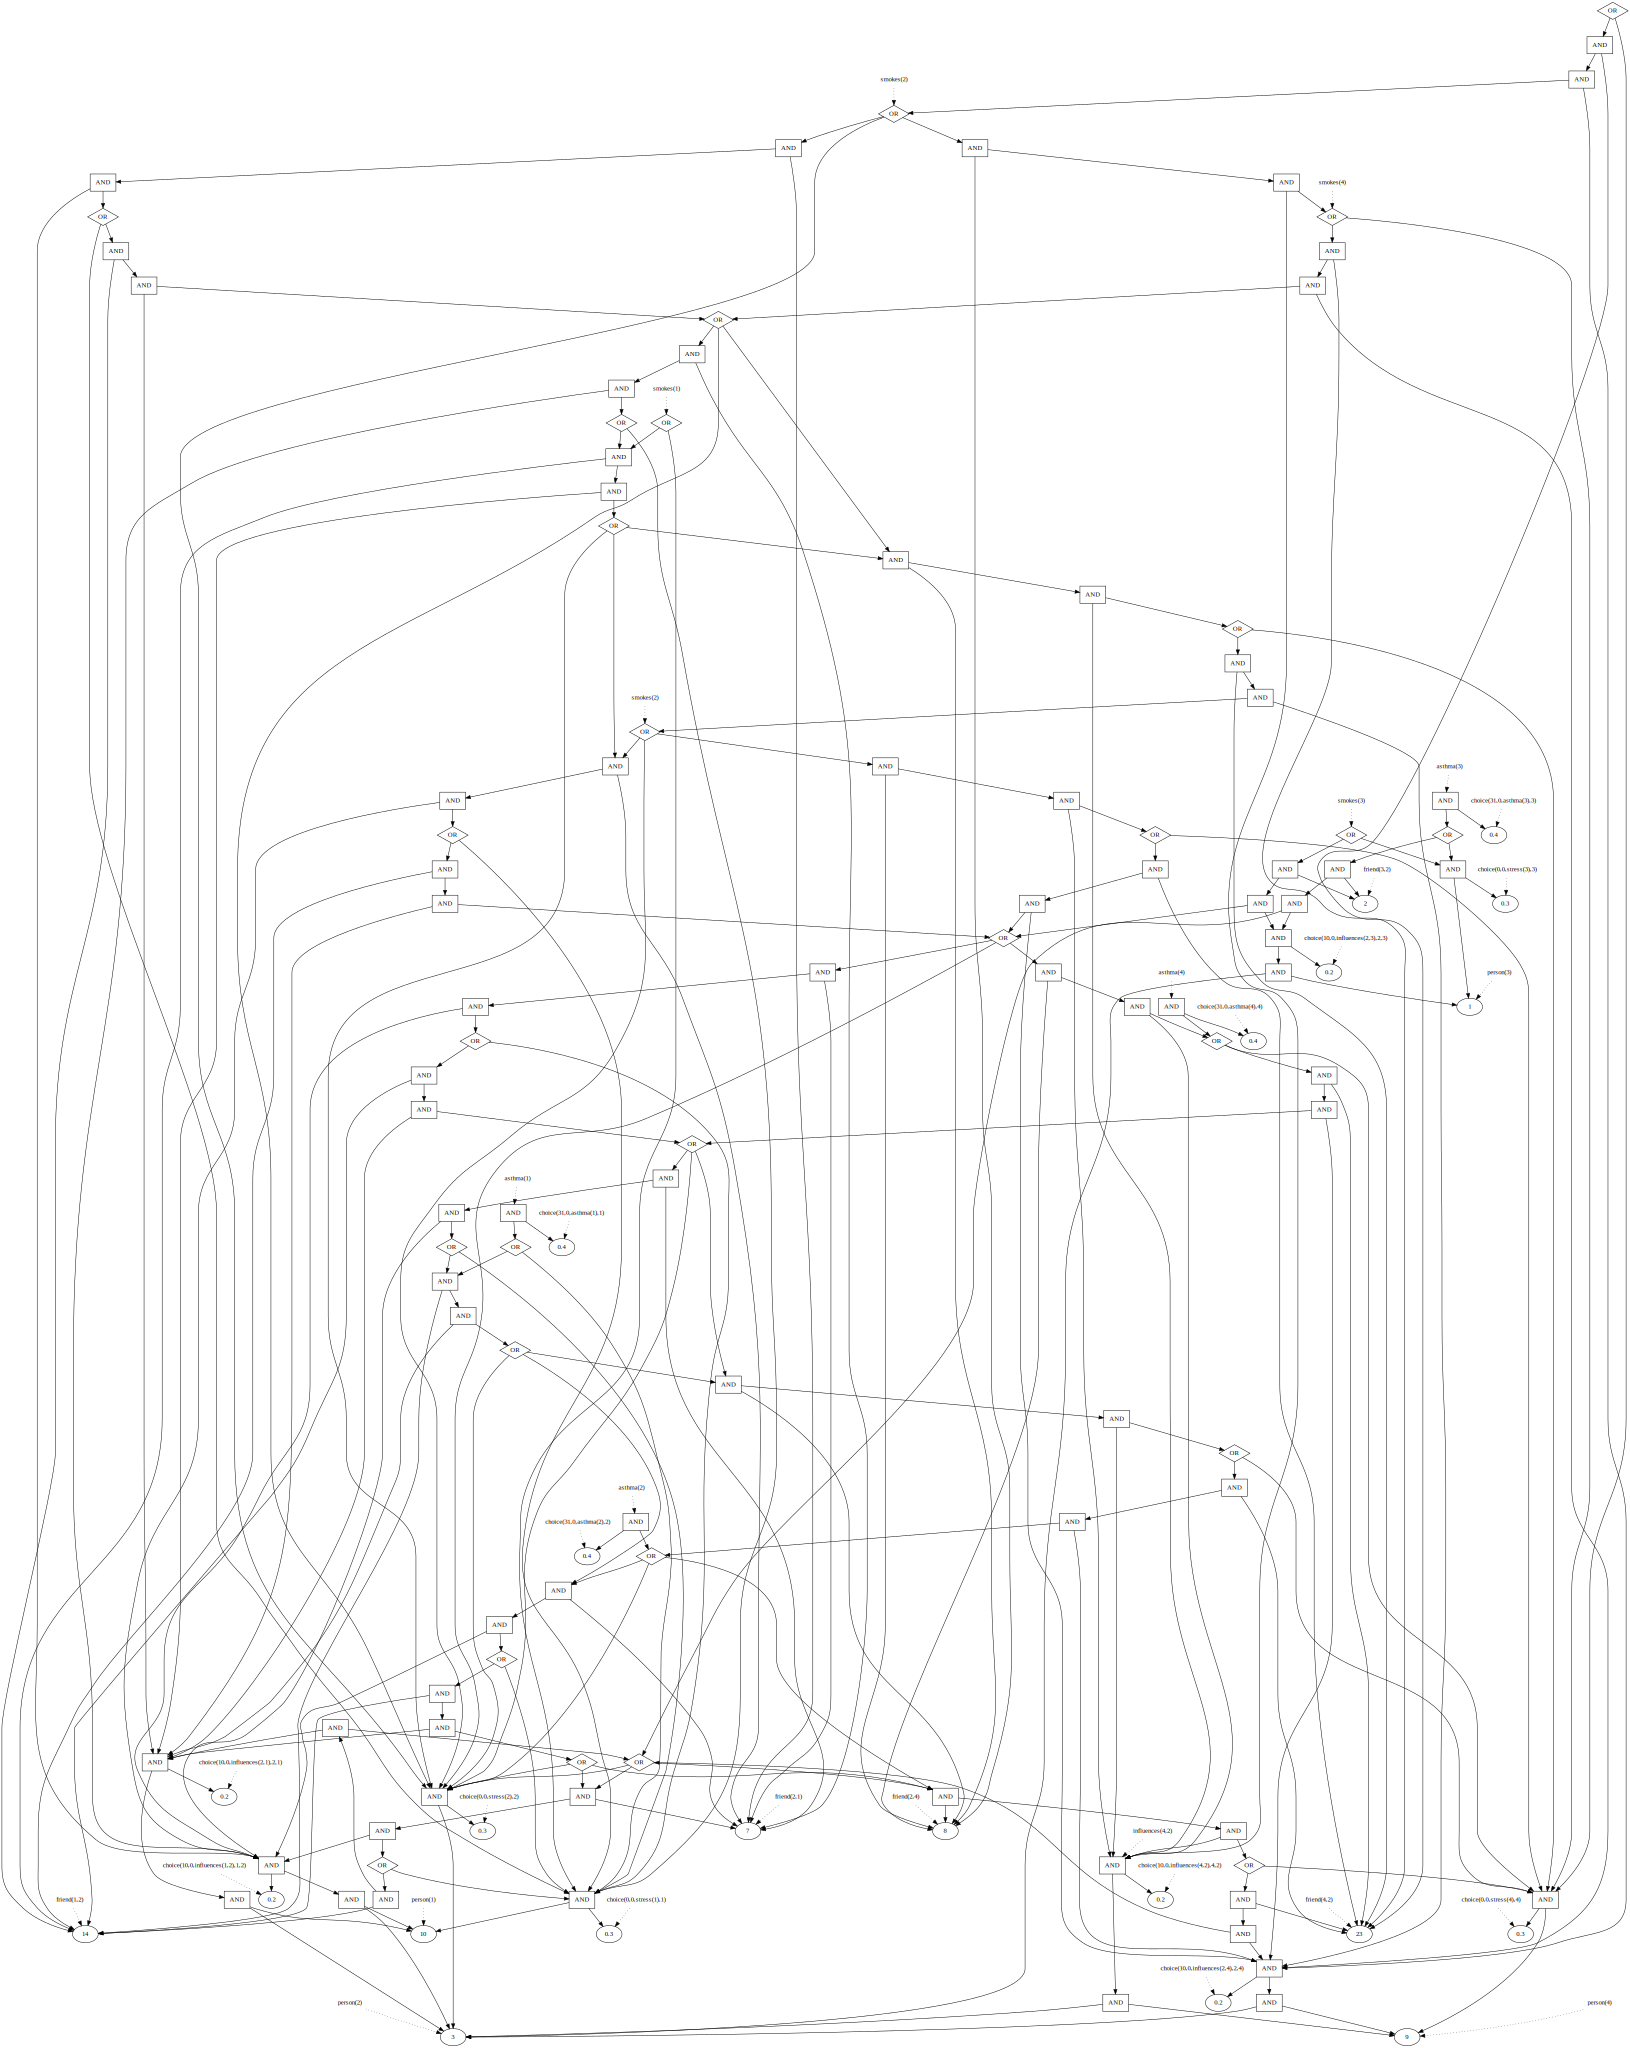

In [8]:
from graphviz import Source

Source(formula.to_dot())

In [9]:
from problog.sdd_formula import SDD

In [10]:
sdd = SDD.create_from(formula)

In [11]:
sdd.evaluate()

{asthma(3): 0.17600000000000005,
 asthma(2): 0.39999999999999997,
 asthma(1): 0.20350877192982456,
 asthma(4): 0.17599999999999996,
 smokes(3): 0.43999999999999995,
 smokes(2): 1.0,
 smokes(1): 0.5087719298245614,
 smokes(4): 0.43999999999999995}